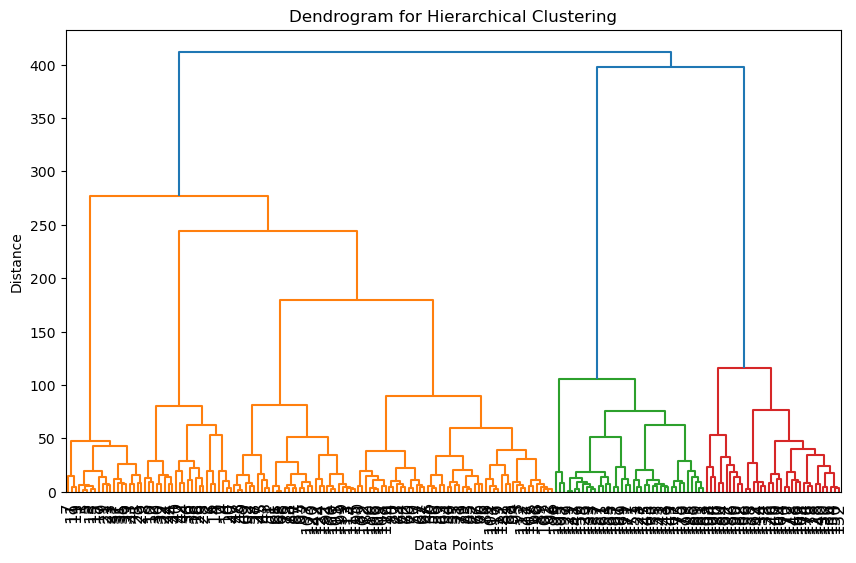

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Read the dataset
df = pd.read_csv('Mall_Customers.csv')

# Encode the "Genre" (Gender) column into numerical values (0 for Male, 1 for Female)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Select relevant features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre']]

# Perform hierarchical clustering
Z = linkage(X, method='ward', metric='euclidean')  # You can choose a different method and metric if needed

# Determine the optimal number of clusters using the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


# Select the number of cluster from dendrogram

In [8]:
# Specify the number of clusters you want (adjust based on the dendrogram)
num_clusters = 3

# Assign cluster labels to the DataFrame
clusters = fcluster(Z, num_clusters, criterion='maxclust')
df['Cluster'] = clusters
print(df)


     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1      0   19                  15                      39   
1             2      0   21                  15                      81   
2             3      1   20                  16                       6   
3             4      1   23                  16                      77   
4             5      1   31                  17                      40   
..          ...    ...  ...                 ...                     ...   
195         196      1   35                 120                      79   
196         197      1   45                 126                      28   
197         198      0   32                 126                      74   
198         199      0   32                 137                      18   
199         200      0   30                 137                      83   

     Cluster  
0          1  
1          1  
2          1  
3          1  
4          1  
..       

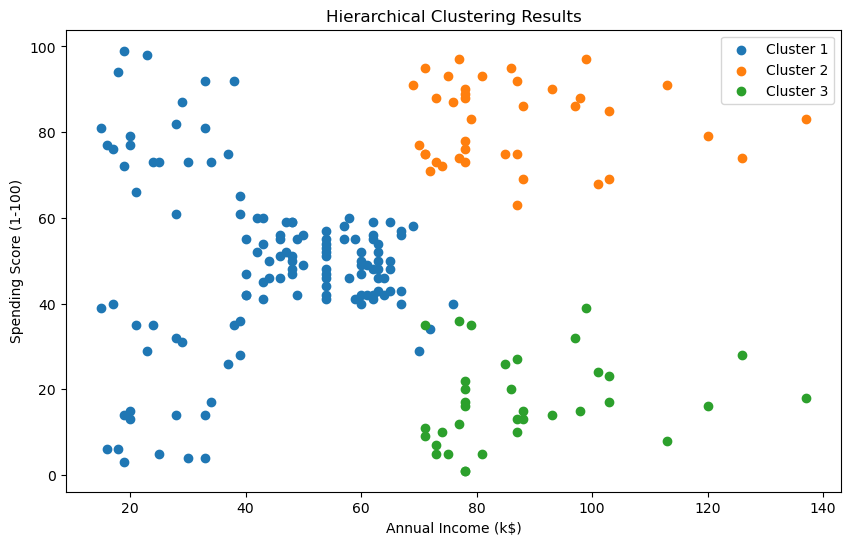

In [9]:
# Visualize the clusters using scatter plots
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.title('Hierarchical Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()